In [ ]:
pip install deap

     |████████████████████████████████| 163kB 16.7MB/s 


In [ ]:
#Importamos las librerías y dependencias
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
# se crean los objetos para maximizar o minimizar
#creator.create("FitnessMax", base.Fitness, weights = (1.0,))
#creator.create("Individuo", list, fitness=creator.FitnessMax)

creator.create("FitnessMin", base.Fitness, weights = (-1.0,))
creator.create("Individuo", list, fitness=creator.FitnessMin)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [ ]:
#Se define la función objetivo "AND" network
def funcion_objetivo(x):
    """
    Función objetivo de nuestro problema
    """
    xtrain =np.array([[0,0],[0,1],[1,0],[1,1]])
    ytrain =np.array([[0],[0],[0],[1]])

    modelo=keras.models.Sequential()
    modelo.add(keras.layers.Dense(10,input_dim=2,activation='tanh'))
    modelo.add(keras.layers.Dense(1,activation='sigmoid')) 
    
    W1a=np.random.randn(2,10)
    b1a=np.zeros(10,)
    W1a[0:]=x[0:10]
    W1a[1:]=x[10:20]
    b1a[:]=x[20:30]
    modelo.layers[0].set_weights([W1a, b1a])

    W2a=np.random.randn(10,1)
    b2a=np.zeros(1,)
    W2a[:]=np.reshape(x[30:40], (10,1))
    b2a[:]=x[40]
    modelo.layers[1].set_weights([W2a, b2a])
    
    ypred=modelo.predict(xtrain)
    res=np.mean(keras.losses.mean_squared_error(ytrain, ypred))
    return res,

In [ ]:
toolbox = base.Toolbox()
# Generación de genes 
toolbox.register("attr_uniform", random.uniform, -100, 100)
# Generación del inviduo, 
# La cantidad de posiciones del individuo determina la cantidad de variables a trabajar
toolbox.register("individuo", tools.initRepeat, creator.Individuo, 
                 toolbox.attr_uniform, 41)
# Generación de la población
toolbox.register("poblacion", tools.initRepeat, list, 
                 toolbox.individuo, 20)

In [ ]:
# Registro de operaciones genéticas
# Parece que los nombres no se pueden modificar
toolbox.register("evaluate", funcion_objetivo)
#toolbox.register("mate", tools.cxOnePoint)
#toolbox.register("mate", tools.cxUniform,indpb=0.25)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, 
                 sigma= 5, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")
    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.fill_between(gen, fit_mins, fit_maxs, 
                     where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generacion")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

gen	nevals	avg     	std     	min 	max     
0  	20    	0.517798	0.250247	0.25	0.990278
1  	14    	0.33729 	0.227268	0   	0.75    
2  	19    	0.4125  	0.227418	1.18532e-37	0.75    
3  	18    	0.412497	0.276981	6.79074e-29	0.75    
4  	18    	0.357729	0.265864	0          	0.75    
5  	18    	0.362803	0.229949	0          	0.75    
6  	15    	0.305447	0.202982	0          	0.75    
7  	14    	0.328913	0.28562 	0          	0.75    
8  	10    	0.212172	0.16339 	0          	0.5     
9  	16    	0.210061	0.237987	0          	0.75    
10 	14    	0.149927	0.242203	0          	0.75    
11 	16    	0.149999	0.215055	0          	0.749976
12 	16    	0.0875  	0.181573	0          	0.75    
13 	14    	0       	0       	0          	0       
14 	19    	0       	0       	0          	0       
15 	20    	0       	0       	0          	0       
16 	12    	0       	0       	0          	0       
17 	15    	0       	0       	0          	0       
18 	16    	0       	0       	0          	0       
19 	18    	0       	0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


30 	20    	0       	0       	0          	0       
Mejor fitness: 0.000000
Mejor individuo [5.3543978408657935, 39.56459493634749, -107.27327389792708, 57.27249935954308, 44.851193150256876, -14.311939565995619, 83.87640394664373, -6.57236671696192, -9.964535573731704, 7.657392693407036, 28.925551461283337, -102.15308453400328, 75.05094319889818, 81.28996473071031, -17.48834208539246, -59.84462771231808, 70.26137848062518, 28.00346925261255, 69.39885508823055, 48.21520844189281, -38.245046754408385, 79.75198256904247, 19.91260317624463, 32.93738034645334, 50.45415861019028, 61.47890208884216, 5.76216651154114, -13.202188960948188, -71.81508179247331, 38.05084746074036, 23.61281463079656, 8.911814308137078, 33.110375966459934, -90.86698694137723, 65.36126208974568, -89.34323426357157, -53.15126677618635, -0.310943318292044, 45.265991784130854, 141.65507251288147, -6.650101433696342]


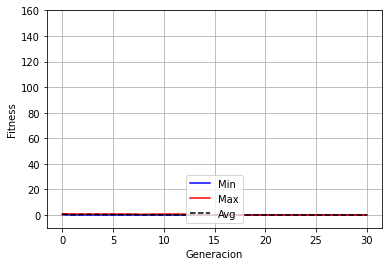

In [ ]:
# Función principal
#random.seed(42)
# Configuración de los parámetros del AG
CXPB, MUTPB, NGEN = 0.8, 0.1, 30
pop = toolbox.poblacion() 
hof = tools.HallOfFame(1) 
stats = tools.Statistics(lambda ind: ind.fitness.values) 
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
logbook = tools.Logbook()
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, 
                                       mutpb=MUTPB, ngen=NGEN, stats=stats, 
                                       halloffame=hof, verbose=True)
#    return hof, logbook 
#best, log = main()
print("Mejor fitness: %f" %hof[0].fitness.values)
print("Mejor individuo %s" %hof[0])
plot_evolucion(logbook)

In [ ]:
x=hof[0]
   
xtrain =np.array([[0,0],[0,1],[1,0],[1,1]])
#ytrain =np.array([[0],[0],[0],[1]])  
#ytrain =np.array([[0],[1],[1],[0]]) 
modelo=keras.models.Sequential()
modelo.add(keras.layers.Dense(10,input_dim=2,activation='tanh'))
modelo.add(keras.layers.Dense(1,activation='sigmoid')) 
W1a=np.random.randn(2,10)
b1a=np.zeros(10,)
W1a[0:]=x[0:10]
W1a[1:]=x[10:20]
b1a[:]=x[20:30]
modelo.layers[0].set_weights([W1a, b1a])
W2a=np.random.randn(10,1)
b2a=np.zeros(1,)
W2a[:]=np.reshape(x[30:40], (10,1))
b2a[:]=x[40]
modelo.layers[1].set_weights([W2a, b2a])
ypred=modelo.predict(xtrain)
print(ypred)


[[1.3872748e-26]
 [1.9367701e-31]
 [0.0000000e+00]
 [1.0000000e+00]]
